# Loan Processing Application Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
## Modeling Dataset 

df = pd.read_csv('Modeling dataset.csv')

df.head()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,Current
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,Fully Paid
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,Fully Paid
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,Current
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,Fully Paid


In [3]:
df.shape

(15000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15000 non-null  int64  
 1   loan_amnt               15000 non-null  int64  
 2   emp_length              15000 non-null  int64  
 3   annual_inc              15000 non-null  float64
 4   delinq_2yrs             15000 non-null  int64  
 5   inq_last_6mths          15000 non-null  int64  
 6   mths_since_last_delinq  15000 non-null  int64  
 7   mths_since_last_record  15000 non-null  int64  
 8   open_acc                15000 non-null  int64  
 9   pub_rec                 15000 non-null  int64  
 10  revol_bal               15000 non-null  int64  
 11  revol_util              15000 non-null  float64
 12  total_acc               15000 non-null  int64  
 13  earliest_cr_line        15000 non-null  object 
 14  purpose                 15000 non-null

In [5]:
df.describe()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,6.851470e+05,11235.113333,5.037667,6.818813e+04,0.143667,0.869133,90.317000,125.894133,9.327333,0.053600,13482.444933,0.489505,22.270933
std,2.084107e+05,7417.557711,3.352978,5.101434e+04,0.477188,1.062865,42.309275,19.084559,4.444776,0.233089,16094.076787,0.282652,11.528179
min,5.473400e+04,500.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5.203982e+05,5500.000000,2.000000,4.056300e+04,0.000000,0.000000,48.000000,130.000000,6.000000,0.000000,3716.500000,0.260000,14.000000
50%,6.701385e+05,10000.000000,4.000000,5.900000e+04,0.000000,1.000000,120.000000,130.000000,9.000000,0.000000,8901.000000,0.490000,21.000000
75%,8.372712e+05,15000.000000,8.000000,8.200000e+04,0.000000,1.000000,120.000000,130.000000,12.000000,0.000000,17117.500000,0.720000,29.000000
max,1.075269e+06,35000.000000,10.000000,2.039784e+06,8.000000,8.000000,120.000000,130.000000,42.000000,4.000000,149527.000000,1.000000,81.000000


In [6]:
## dropping id column 

df.drop(columns=['id'], inplace=True)

In [7]:
## Numeric columns in dataset

import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

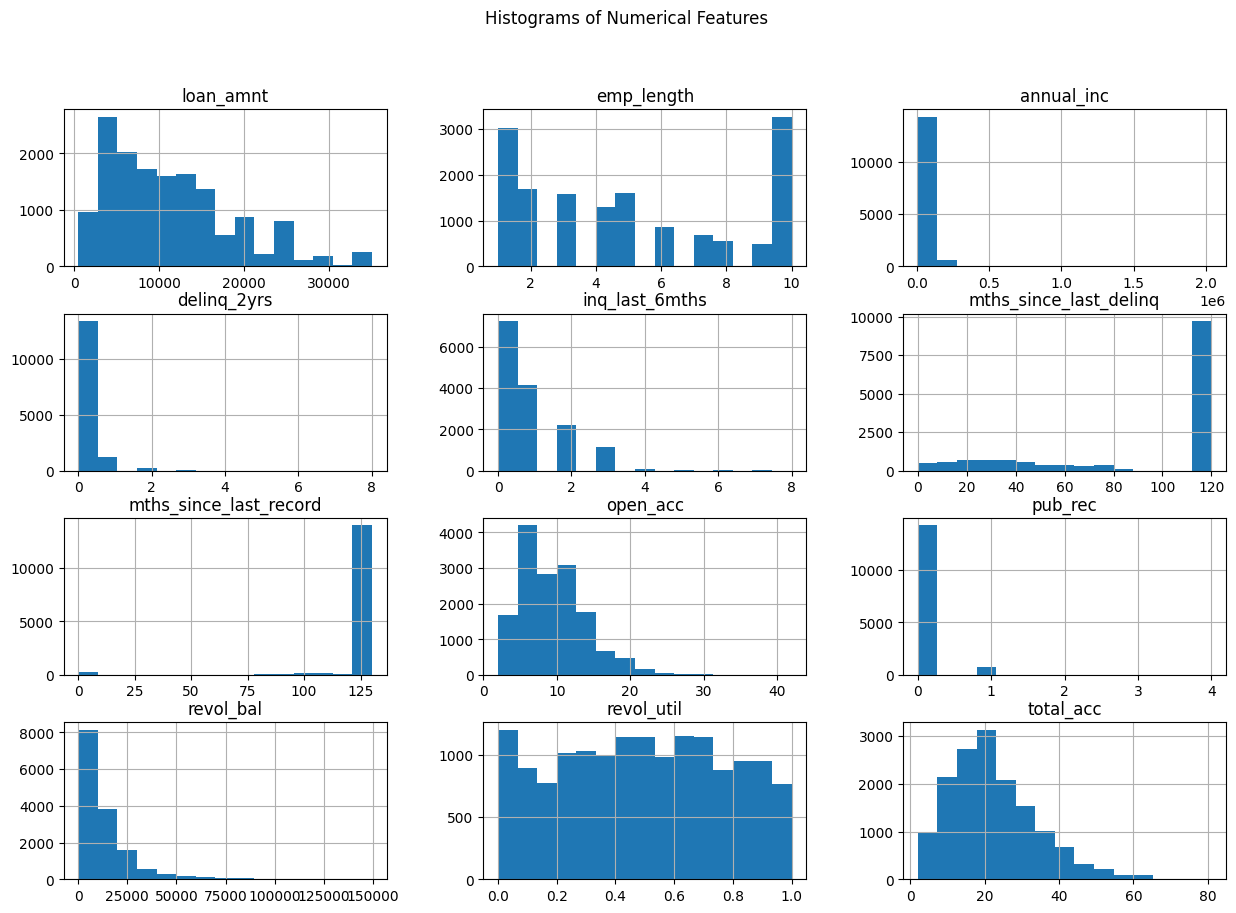

In [8]:
# Histogram plots of the numeric columns:

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [9]:
df.isnull().sum()

loan_amnt                    0
emp_length                   0
annual_inc                   0
delinq_2yrs                  0
inq_last_6mths               0
mths_since_last_delinq       0
mths_since_last_record       0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
earliest_cr_line             0
purpose                      0
desc                      4937
loan_status                  0
dtype: int64

In [10]:
df['loan_status'].value_counts()

loan_status
Fully Paid            9416
Current               3542
Charged Off           1872
Late (31-120 days)      78
In Grace Period         63
Late (16-30 days)       23
Default                  6
Name: count, dtype: int64

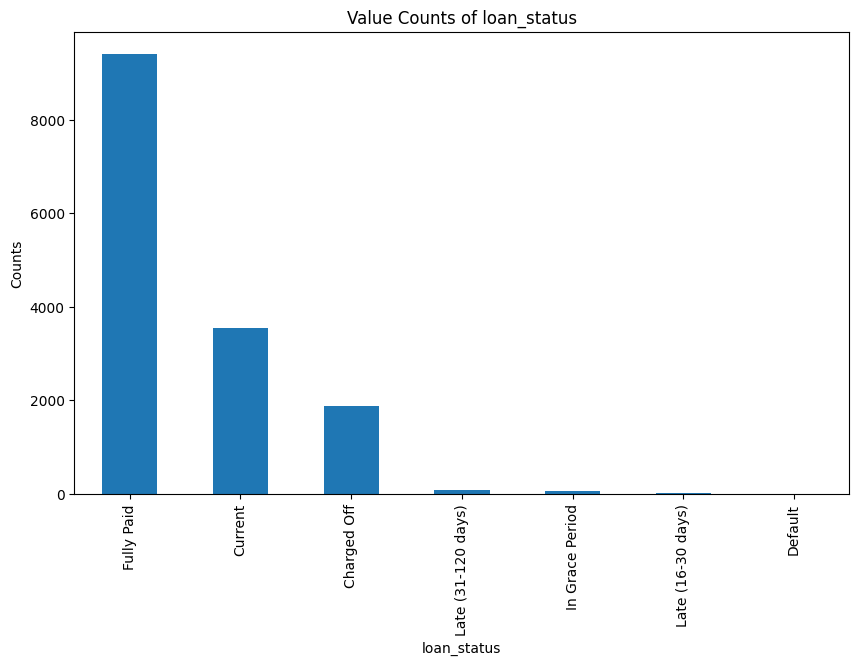

In [11]:
# Loan_status plot

column_name = 'loan_status' 

value_counts = df[column_name].value_counts()
value_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Value Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Counts')



plt.show()


In [12]:
## On the basis of categories provided and understanding of those terms, converting 

df['target'] = df['loan_status'].apply(lambda x: 1 if x in ['Current', 'Fully Paid'] else 0)

In [13]:
df.drop(columns=['loan_status'], inplace=True)

In [14]:
df.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,target
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,1
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,1
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,1
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,1
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,1


In [15]:
# Convert the 'earliest_cr_line' column to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')


print(f"Data type after conversion: {df['earliest_cr_line'].dtype}")


print(df['earliest_cr_line'].head())

Data type after conversion: datetime64[ns]
0   1990-07-18 03:54:00
1   1983-10-07 08:46:00
2   1992-04-07 11:32:00
3   2003-01-21 02:40:00
4   1997-09-08 07:19:00
Name: earliest_cr_line, dtype: datetime64[ns]


Minimum date: 1950-12-05 01:38:00
Maximum date: 2008-10-01 04:36:00


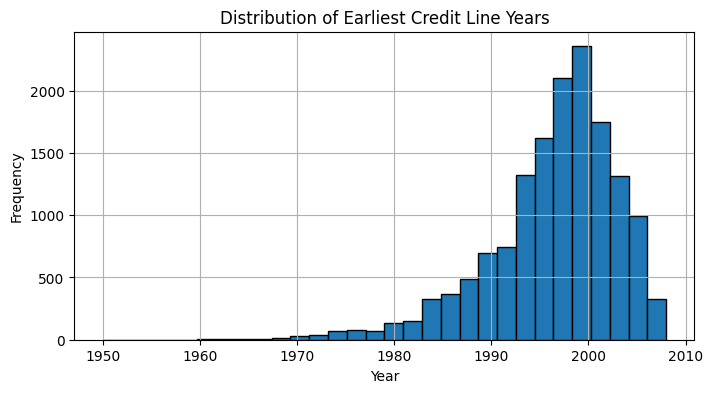

In [16]:
earliest_cr_line = df['earliest_cr_line']

# Finding min and max dates in dataset
min_date = earliest_cr_line.min()
max_date = earliest_cr_line.max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

years = earliest_cr_line.dt.year

plt.figure(figsize=(8, 4))
years.hist(bins=30, edgecolor='black')
plt.title('Distribution of Earliest Credit Line Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Calculating the number of years since the earliest credit line date
from datetime import datetime
current_date = datetime.now()
df['credit_age_years'] = (current_date - df['earliest_cr_line']).dt.days / 365.25


df = df.drop(columns=['earliest_cr_line'])

# DataFrame with the new feature
df.head()


,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,purpose,desc,target,credit_age_years
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,debt_consolidation,NaN,1,34.050650
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,1,40.829569
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,credit_card,Borrower added on 01/28/11 > pay off credit ...,1,32.325804
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,other,Borrower added on 07/11/11 > I have been con...,1,21.538672
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,debt_consolidation,NaN,1,26.907598


In [18]:
## PURPOSE-  one hot encoding

df['purpose'].value_counts()


purpose
debt_consolidation    7101
credit_card           1856
other                 1466
home_improvement      1178
major_purchase         830
small_business         678
car                    608
wedding                373
medical                271
moving                 198
vacation               144
house                  135
educational            122
renewable_energy        40
Name: count, dtype: int64

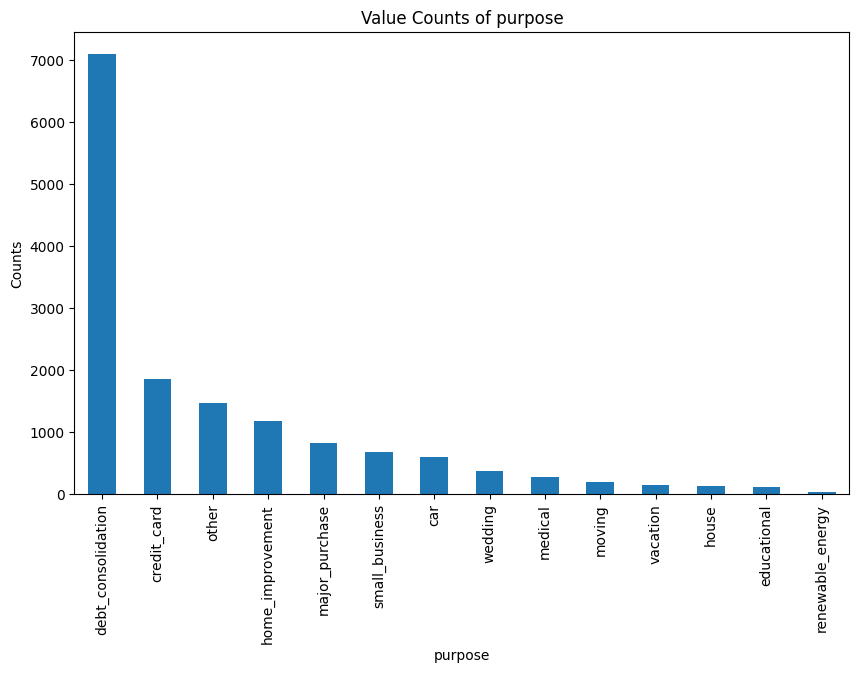

In [19]:

column_name = 'purpose'  


if df[column_name].dtype == 'object':
    # For categorical columns
    value_counts = df[column_name].value_counts()
    value_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Value Counts of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
else:
    # For numeric columns
    df[column_name].plot(kind='bar', figsize=(10, 6))
    plt.title(f'Bar Graph of {column_name}')
    plt.xlabel('Index')
    plt.ylabel(column_name)


plt.show()


In [20]:
# Create a mapping dictionary according to categories in form
purpose_mapping = {
    'debt_consolidation': 'debt',
    'credit_card': 'debt',
    'other': 'personal',
    'home_improvement': 'home loan',
    'small_business': 'personal',
    'major_purchase': 'personal',
    'car': 'personal',
    'wedding': 'personal',
    'medical': 'personal',
    'house': 'home loan',
    'moving': 'personal',
    'vacation': 'personal',
    'educational': 'education loan',
    'renewable_energy': 'home loan'
}


df['broad_purpose'] = df['purpose'].map(purpose_mapping)
df['broad_purpose'].value_counts()
df.drop(columns=['purpose'], inplace=True)

In [21]:
df.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,desc,target,credit_age_years,broad_purpose
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,NaN,1,34.050650,debt
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,Borrower added on 11/09/11 > This loan is fo...,1,40.829569,debt
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,Borrower added on 01/28/11 > pay off credit ...,1,32.325804,debt
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,Borrower added on 07/11/11 > I have been con...,1,21.538672,personal
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,NaN,1,26.907598,debt


In [22]:
# Performing one-hot encoding on the 'purpose' column

df = pd.get_dummies(df, columns=['broad_purpose'], prefix='broad_purpose', dtype=int)


df.head()


,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,desc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,NaN,1,34.050650,1,0,0,0
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,Borrower added on 11/09/11 > This loan is fo...,1,40.829569,1,0,0,0
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,Borrower added on 01/28/11 > pay off credit ...,1,32.325804,1,0,0,0
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,Borrower added on 07/11/11 > I have been con...,1,21.538672,0,0,0,1
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,NaN,1,26.907598,1,0,0,0


In [23]:
## DESCRIPTION - extracing some meaningful keywords ['borrow','credit','debt'] from the text and using them as new features

df['desc'].isnull().sum()

np.int64(4937)

In [25]:
# text preprocessing for desc

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')



# Replacing NaN values in 'description' column with an empty string
df['desc_new'] = df['desc'].fillna('')

# function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'<br/>', ' ', text)  # Replace HTML line breaks with spaces
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(tokens)
    else:
        return ''

# Apply preprocessing to the 'description' column
df['cleaned_description'] = df['desc_new'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DhairyanshChaudhari\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DhairyanshChaudhari\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [26]:
pd.pandas.set_option('display.max_columns',None)

In [27]:
# Define the predefined words
predefined_words = ['borrow', 'credit', 'debt']

# Create a function to extract features for predefined words
def extract_features(tokens, words):
    features = {}
    for word in words:
        features[word] = int(word in tokens)
    return features

# Apply the feature extraction
df_features = df['cleaned_description'].apply(lambda x: extract_features(x, predefined_words))

# Convert the features to a DataFrame
features_df = pd.DataFrame(list(df_features))

# Concatenate with the original dataframe
df_final = pd.concat([df, features_df], axis=1)


In [28]:
df_final

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,desc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,desc_new,cleaned_description,borrow,credit,debt
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,NaN,1,34.050650,1,0,0,0,,,0,0,0
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,Borrower added on 11/09/11 > This loan is fo...,1,40.829569,1,0,0,0,Borrower added on 11/09/11 > This loan is fo...,borrower added 110911 loan business needed bri...,1,0,0
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,Borrower added on 01/28/11 > pay off credit ...,1,32.325804,1,0,0,0,Borrower added on 01/28/11 > pay off credit ...,borrower added 012811 pay credit card debt hig...,1,1,1
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,Borrower added on 07/11/11 > I have been con...,1,21.538672,0,0,0,1,Borrower added on 07/11/11 > I have been con...,borrower added 071111 continuously employed st...,1,1,0
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,NaN,1,26.907598,1,0,0,0,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,9250,1,13000.0,0,1,31,130,4,0,3498,0.48,9,My husband and I have just purchased a whitewa...,0,24.747433,0,0,0,1,My husband and I have just purchased a whitewa...,husband purchased whitewater rafting company c...,0,0,0
14996,3825,3,26000.0,0,0,120,130,7,0,5442,0.92,8,NaN,1,18.885695,1,0,0,0,,,0,0,0
14997,10000,1,35000.0,0,1,120,119,7,1,7380,0.58,25,NaN,0,26.376454,1,0,0,0,,,0,0,0
14998,7200,1,30000.0,0,0,120,130,6,0,12099,0.74,11,NaN,0,18.600958,1,0,0,0,,,0,0,0


In [29]:
df_final.drop(columns=['desc'], inplace=True)
df_final.drop(columns=['desc_new'], inplace=True)
df_final.drop(columns=['cleaned_description'], inplace=True)

df_final

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,borrow,credit,debt
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,1,34.050650,1,0,0,0,0,0,0
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,1,40.829569,1,0,0,0,1,0,0
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,1,32.325804,1,0,0,0,1,1,1
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1,21.538672,0,0,0,1,1,1,0
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,1,26.907598,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,9250,1,13000.0,0,1,31,130,4,0,3498,0.48,9,0,24.747433,0,0,0,1,0,0,0
14996,3825,3,26000.0,0,0,120,130,7,0,5442,0.92,8,1,18.885695,1,0,0,0,0,0,0
14997,10000,1,35000.0,0,1,120,119,7,1,7380,0.58,25,0,26.376454,1,0,0,0,0,0,0
14998,7200,1,30000.0,0,0,120,130,6,0,12099,0.74,11,0,18.600958,1,0,0,0,0,0,0


In [30]:
## Adding debt_to_income_ratio as a new feature

df_final['debt_to_income_ratio'] = df_final['loan_amnt'] / df_final['annual_inc']

In [31]:
df_final.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,borrow,credit,debt,debt_to_income_ratio
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,1,34.050650,1,0,0,0,0,0,0,0.322581
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,1,40.829569,1,0,0,0,1,0,0,0.314286
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,1,32.325804,1,0,0,0,1,1,1,0.031624
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1,21.538672,0,0,0,1,1,1,0,0.223556
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,1,26.907598,1,0,0,0,0,0,0,0.160000


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_amnt                     15000 non-null  int64  
 1   emp_length                    15000 non-null  int64  
 2   annual_inc                    15000 non-null  float64
 3   delinq_2yrs                   15000 non-null  int64  
 4   inq_last_6mths                15000 non-null  int64  
 5   mths_since_last_delinq        15000 non-null  int64  
 6   mths_since_last_record        15000 non-null  int64  
 7   open_acc                      15000 non-null  int64  
 8   pub_rec                       15000 non-null  int64  
 9   revol_bal                     15000 non-null  int64  
 10  revol_util                    15000 non-null  float64
 11  total_acc                     15000 non-null  int64  
 12  target                        15000 non-null  int64  
 13  c

In [33]:
df_final.shape

(15000, 22)

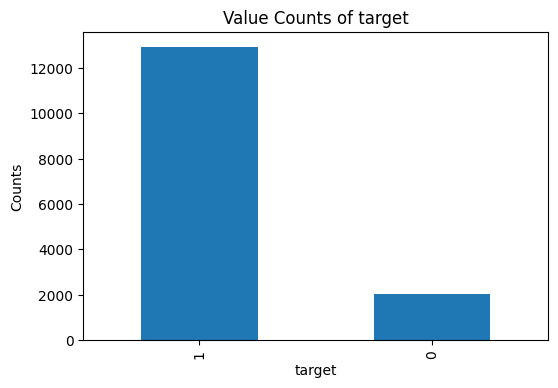

Number of 1s: 12958 (86.39%)
Number of 0s: 2042 (13.61%)


In [34]:
column_name = 'target' 


value_counts = df[column_name].value_counts()
value_counts.plot(kind='bar', figsize=(6, 4))
plt.title(f'Value Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Counts')

plt.show()

target_column = 'target'

# Getting the value counts of 0 and 1 in the target column
value_counts = df_final[target_column].value_counts()

# Calculating the total number of rows
total_count = len(df)

# Calculating the percentages
percentage_0 = (value_counts[0] / total_count) * 100
percentage_1 = (value_counts[1] / total_count) * 100

#  values and percentages
print(f"Number of 1s: {value_counts[1]} ({percentage_1:.2f}%)")
print(f"Number of 0s: {value_counts[0]} ({percentage_0:.2f}%)")



In [35]:
d1=df_final.corr()
d1

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,borrow,credit,debt,debt_to_income_ratio
loan_amnt,1.000000,0.149511,0.323940,-0.035355,-0.003428,0.073399,0.051798,0.175971,-0.058674,0.305924,0.070455,0.255660,-0.034651,0.194510,0.203492,-0.041400,0.017712,-0.219820,0.121320,0.108997,0.149748,0.606676
emp_length,0.149511,1.000000,0.124105,0.018369,0.019942,-0.017117,0.011949,0.103220,0.052781,0.143640,0.005047,0.210693,0.005967,0.279102,0.018308,-0.039537,0.079962,-0.061570,0.017927,-0.064973,-0.045344,0.000126
annual_inc,0.323940,0.124105,1.000000,0.022679,0.049131,-0.025240,-0.009185,0.188999,-0.009999,0.331349,0.029381,0.287677,0.049322,0.233947,-0.013078,-0.021381,0.098906,-0.043456,0.000594,-0.008567,0.014288,-0.279910
delinq_2yrs,-0.035355,0.018369,0.022679,1.000000,0.017748,-0.549191,-0.002020,0.008632,0.006888,-0.061197,-0.037242,0.053813,-0.028776,0.057962,-0.043816,0.006957,0.019810,0.033009,-0.007702,-0.045272,-0.016127,-0.062084
inq_last_6mths,-0.003428,0.019942,0.049131,0.017748,1.000000,-0.021861,-0.033969,0.096694,0.030737,-0.024374,-0.071114,0.127700,-0.072109,0.011749,-0.072107,0.031403,0.074899,0.024097,-0.027046,-0.025870,-0.042612,-0.045745
mths_since_last_delinq,0.073399,-0.017117,-0.025240,-0.549191,-0.021861,1.000000,0.236044,-0.016216,-0.031348,0.090949,0.014485,-0.086791,0.024539,-0.108262,0.051409,-0.015608,-0.039362,-0.027241,0.047231,0.052295,0.020979,0.100546
mths_since_last_record,0.051798,0.011949,-0.009185,-0.002020,-0.033969,0.236044,1.000000,-0.003319,-0.418843,0.018902,0.011245,0.034447,0.019913,-0.030185,0.011198,-0.042631,-0.006997,0.000741,0.101246,-0.034978,-0.012671,0.030065
open_acc,0.175971,0.103220,0.188999,0.008632,0.096694,-0.016216,-0.003319,1.000000,0.006102,0.286743,-0.088154,0.684317,0.009378,0.227975,0.113826,-0.003997,-0.000413,-0.120275,0.002804,0.047742,0.056963,-0.042544
pub_rec,-0.058674,0.052781,-0.009999,0.006888,0.030737,-0.031348,-0.418843,0.006102,1.000000,-0.053088,0.057660,-0.022028,-0.048833,0.044427,0.005776,-0.001717,0.009464,-0.011712,-0.001547,-0.013180,-0.021007,-0.048939
revol_bal,0.305924,0.143640,0.331349,-0.061197,-0.024374,0.090949,0.018902,0.286743,-0.053088,1.000000,0.302180,0.310031,0.005428,0.262493,0.153121,-0.019423,-0.025230,-0.143695,-0.020378,0.061132,0.079875,-0.013711


<Axes: >

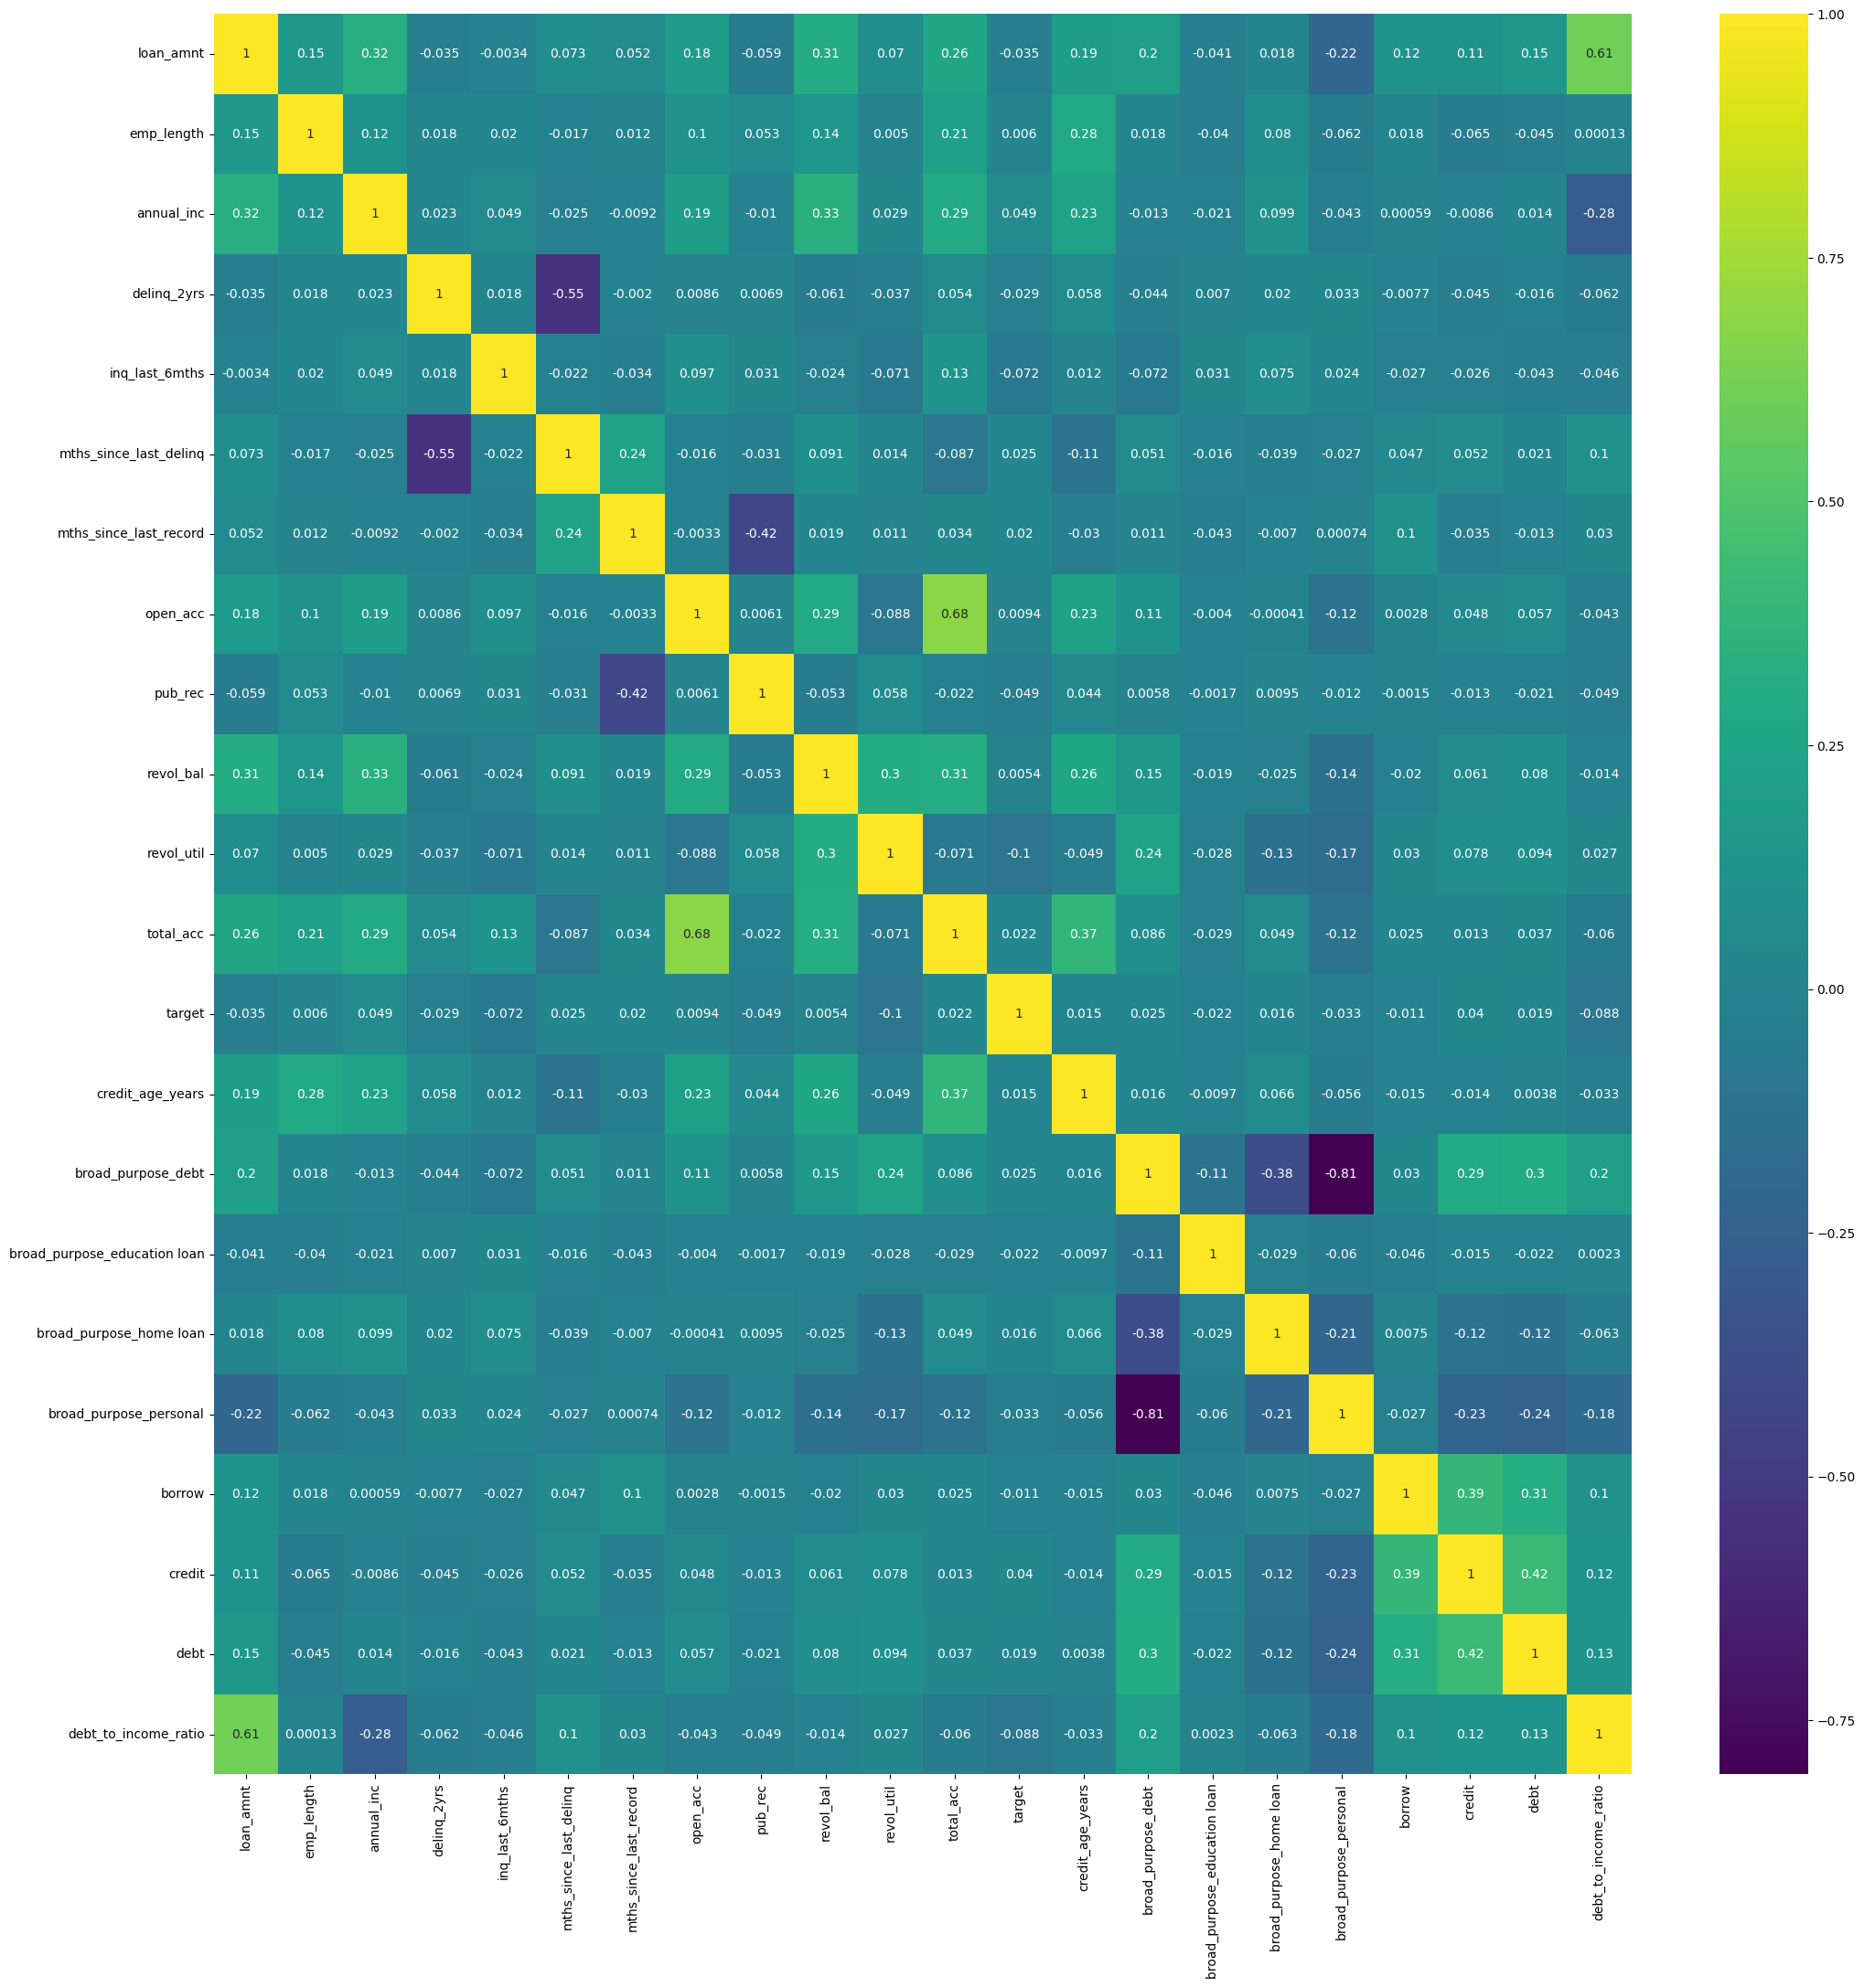

In [36]:
## Plotting the heatmap

plt.figure(figsize=(25,25))
sns.heatmap(data=d1,yticklabels=True,cbar=True,annot=True,cmap='viridis')


In [38]:
## Libraries used

import pandas as pd
import numpy as np
import json
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [39]:
# Custom identity transformer for binary features

def identity_transform(x):
    return x
    
target_column = 'target'
X = df_final.drop(columns=[target_column])
y = df_final[target_column]


In [40]:
df_final.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,target,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,borrow,credit,debt,debt_to_income_ratio
0,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,1,34.050650,1,0,0,0,0,0,0,0.322581
1,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,1,40.829569,1,0,0,0,1,0,0,0.314286
2,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,1,32.325804,1,0,0,0,1,1,1,0.031624
3,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1,21.538672,0,0,0,1,1,1,0,0.223556
4,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,1,26.907598,1,0,0,0,0,0,0,0.160000


In [41]:
# specific features for scaling (except binary)

features_for_scaling = ['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_age_years', 'debt_to_income_ratio']  # replace with your actual feature names
binary_features = [col for col in X.columns if col not in features_for_scaling]


In [42]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train.head()

,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,credit_age_years,broad_purpose_debt,broad_purpose_education loan,broad_purpose_home loan,broad_purpose_personal,borrow,credit,debt,debt_to_income_ratio
9839,25000,7,60000.0,0,2,120,130,15,0,27125,0.50,27,24.525667,1,0,0,0,0,0,0,0.416667
9680,22000,3,155000.0,0,0,38,130,13,0,72951,0.98,39,35.006160,1,0,0,0,0,1,1,0.141935
7093,18000,5,69000.0,0,1,120,130,8,0,19996,0.59,23,32.224504,1,0,0,0,0,0,0,0.260870
11293,15000,4,45500.0,0,1,120,130,11,0,8757,0.52,18,21.705681,1,0,0,0,1,1,1,0.329670
820,9000,6,52000.0,0,0,120,130,12,0,5572,0.15,24,25.708419,1,0,0,0,0,0,0,0.173077


In [44]:
# ColumnTransformer that only scales specified features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_for_scaling),
        ('bin', FunctionTransformer(identity_transform, validate=False), binary_features )# ye line hata k bhi same aana chahiye
    ],
    remainder='passthrough'
)

In [45]:
# pipeline with SMOTETomek, ColumnTransformer, and LogisticRegression

pipeline = Pipeline([
    ('smotetomek', SMOTETomek(sampling_strategy='auto', random_state=42)),
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
])

# Define parameter grid for GridSearch
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

In [46]:
# USING GridSearchCV to find the best hyperparameters

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(random_state=42)),
                                       ('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'annual_inc',
                                                                          'delinq_2yrs',
                                                                          'inq_last_6mths',
                                                                          'mths_since_last_delinq',
                                                                          'mths_since_last_record',
                                                                          'open_acc',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc'...
                                                                          'debt_to_income_ratio']),
                                                                        ('bin',
                                                                         FunctionTransformer(func=<function identity_transform at 0x0000025B26B80EA0>),
                                                                         ['pub_rec',
                                                                          'broad_purpose_debt',
                                                                          'broad_purpose_education '
                                                                          'loan',
                                                                          'broad_purpose_home '
                                                                          'loan',
                                                                          'broad_purpose_personal',
                                                                          'borrow',
                                                                          'credit',
                                                                          'debt'])])),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [47]:
# Extracting the best parameters from GridSearch

print("Best parameters:", grid_search.best_params_)


Best parameters: {'logreg__C': 100}


In [48]:
# Evaluating the model

# extracting the test data
y_pred = grid_search.predict(X_test)

f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

F1 Score: 0.8448344635021938
Confusion Matrix:
 [[ 104  308]
 [ 470 2118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.25      0.21       412
           1       0.87      0.82      0.84      2588

    accuracy                           0.74      3000
   macro avg       0.53      0.54      0.53      3000
weighted avg       0.78      0.74      0.76      3000



In [49]:
# Accessing the best logistic regression model i.e. with logreg_C=100 as calculated above

best_logreg = grid_search.best_estimator_.named_steps['logreg']

# Getting the coefficients and intercept

coefficients = best_logreg.coef_[0]
intercept = best_logreg.intercept_[0]


In [50]:


preprocessor = grid_search.best_estimator_.named_steps['preprocessor']
scaled_feature_names = preprocessor.transformers_[0][2]  # Features that were scaled
binary_feature_names = preprocessor.transformers_[1][2]  # Features that were not scaled

# Combine feature names in the same order they were processed by ColumnTransformer

feature_names = list(scaled_feature_names) + list(binary_feature_names)
coef_dict = dict(zip(feature_names, coefficients))


In [51]:
## viewing the coefficients obtained

print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef}")

# Saving the weights to a JSON file for it to be used at backend
weights = {
    'intercept': intercept,
    'coefficients': coef_dict
}

weights_file = 'model_weights_oversampler_new.json'
with open(weights_file, 'w') as f:
    json.dump(weights, f)

print(f"Weights saved to {weights_file}")


Intercept: -9.134987491778636
Coefficients:
loan_amnt: -0.17117730791321342
emp_length: 0.08865258108434428
annual_inc: 0.22332118070359425
delinq_2yrs: 0.16247313289516116
inq_last_6mths: -0.0724508483380592
mths_since_last_delinq: 0.21221633392107644
mths_since_last_record: 0.04727070705339563
open_acc: -0.11247710588032628
revol_bal: 0.07661575942599812
revol_util: -0.47669827333452847
total_acc: 0.06049574955662817
credit_age_years: -0.040024378344018445
debt_to_income_ratio: -0.2261504155433627
pub_rec: 0.465750022484326
broad_purpose_debt: 9.150673121512678
broad_purpose_education loan: 9.394493152403717
broad_purpose_home loan: 10.08660502110742
broad_purpose_personal: 9.286601797321474
borrow: 0.11971667378462375
credit: 0.7594120288660064
debt: 0.6354559668561739
Weights saved to model_weights_oversampler_new.json


In [52]:
# Saving the model

model_file = 'credit_score_model_oversampler_new2.pkl'
joblib.dump(grid_search.best_estimator_, model_file)
print(f"Model saved to {model_file}")


# Saving the scaling parameters, again to be used at backend

scaler = preprocessor.named_transformers_['num']
scaler_params = {
    'name': 'StandardScaler',
    'features': {
        feature: {
            'mean': scaler.mean_[i],
            'scale': scaler.scale_[i]
        }
        for i, feature in enumerate(features_for_scaling)
    }
}

scaler_params_file = 'scaler_params_new_2_final.json'
with open(scaler_params_file, 'w') as f:
    json.dump(scaler_params, f)

print(f"Scaler parameters saved to {scaler_params_file}")

# Print the names of the scaled features
print("Scaled features:", features_for_scaling)

Model saved to credit_score_model_oversampler_new2.pkl
Scaler parameters saved to scaler_params_new_2_final.json
Scaled features: ['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_age_years', 'debt_to_income_ratio']


In [53]:
## Examining the features after standard scaling 

X_train_scaled = preprocessor.fit_transform(X_train)
print("Samples after scaling:")
print(pd.DataFrame(X_train_scaled, columns=feature_names).head())

Samples after scaling:
   loan_amnt  emp_length  annual_inc  delinq_2yrs  inq_last_6mths  \
0   1.861522    0.588786   -0.161927     -0.30274        1.073939   
1   1.456382   -0.603742    1.701558     -0.30274       -0.820272   
2   0.916196   -0.007478    0.014613     -0.30274        0.126833   
3   0.511056   -0.305610   -0.446354     -0.30274        0.126833   
4  -0.299224    0.290654   -0.318852     -0.30274       -0.820272   

   mths_since_last_delinq  mths_since_last_record  open_acc  revol_bal  \
0                0.699219                0.214352  1.273853   0.833236   
1               -1.240330                0.214352  0.825228   3.644215   
2                0.699219                0.214352 -0.296336   0.395941   
3                0.699219                0.214352  0.376602  -0.293462   
4                0.699219                0.214352  0.600915  -0.488831   

   revol_util  total_acc  credit_age_years  debt_to_income_ratio  pub_rec  \
0    0.038387   0.410563         -0.4293

In [54]:
# THRESHOLD TUNING

import numpy as np
from sklearn.metrics import classification_report

# Predict probabilities
y_probs = best_logreg.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.linspace(0.1, 0.9, 9)

# Store performance metrics for each threshold
results = []

for threshold in thresholds:
    # Apply the threshold to make binary predictions
    y_decision = (y_probs >= threshold).astype(int)

    # Evaluate the performance
    report = classification_report(y_test, y_decision, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1-score_1': report['1']['f1-score'],
        'support_1': report['1']['support']
    })

# Convert results to a DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best threshold based on the highest F1 score for the minority class
best_threshold = results_df.loc[results_df['f1-score_1'].idxmax(), 'threshold']
print(f'Best threshold: {best_threshold}')

# Reapply the best threshold to make final predictions
y_decision_best = (y_probs >= best_threshold).astype(int)

# Evaluate the model with the best threshold
print(classification_report(y_test, y_decision_best))


   threshold  precision_1  recall_1  f1-score_1  support_1
0        0.1     0.867829  0.865147    0.866486     2588.0
1        0.2     0.867829  0.865147    0.866486     2588.0
2        0.3     0.867829  0.865147    0.866486     2588.0
3        0.4     0.867829  0.865147    0.866486     2588.0
4        0.5     0.867829  0.865147    0.866486     2588.0
5        0.6     0.867829  0.865147    0.866486     2588.0
6        0.7     0.867829  0.865147    0.866486     2588.0
7        0.8     0.868166  0.865147    0.866654     2588.0
8        0.9     0.868166  0.865147    0.866654     2588.0
Best threshold: 0.8
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       412
           1       0.87      0.87      0.87      2588

    accuracy                           0.77      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.77      0.77      0.77      3000



c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [55]:
import joblib
import json
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Load the saved model
model = joblib.load('credit_score_model_oversampler_new2.pkl')

# Predict probabilities on the test data using the loaded model
# Note: You need to have X_test and y_test available or reload them if needed
y_proba_loaded = model.predict_proba(X_test)[:, 1]

# Function to generate credit score based on prediction probability
def generate_credit_score(proba):
    return proba * 1000  # Simple example: scale probability to a score out of 1000

# Generate credit scores for the test set
credit_scores = generate_credit_score(y_proba_loaded)

# Set the credit score thresholds for loan approval
credit_score_thresholds = np.linspace(100, 900, 40)

# Calculate and print the metrics for each threshold
print("Metrics for different credit score thresholds:")

for threshold in credit_score_thresholds:
    # Predict loan approval based on the credit score threshold
    loan_approval_predictions = credit_scores >= threshold
    
    # Calculate the F1 scores for the current threshold
    f1 = f1_score(y_test, loan_approval_predictions, average='binary')
    f1_per_class = f1_score(y_test, loan_approval_predictions, average=None)
    
    # Calculate the confusion matrix for the current threshold
    conf_matrix = confusion_matrix(y_test, loan_approval_predictions)
    
    # Generate the classification report for detailed metrics
    #report = classification_report(y_test, loan_approval_predictions, target_names=['Rejected', 'Approved'], output_dict=True)
    
    # Print the metrics for the current threshold
    print(f"\nThreshold = {threshold}")
    print(f"F1 Score (overall) = {f1:.4f}")
    print(f"F1 Score (class 0) = {f1_per_class[0]:.4f}")
    print(f"F1 Score (class 1) = {f1_per_class[1]:.4f}")
    #print(f"Confusion Matrix:\n{conf_matrix}")
    #print(f"Classification Report:\n{report}")


Metrics for different credit score thresholds:

Threshold = 100.0
F1 Score (overall) = 0.9263
F1 Score (class 0) = 0.0000
F1 Score (class 1) = 0.9263

Threshold = 120.51282051282051
F1 Score (overall) = 0.9261
F1 Score (class 0) = 0.0000
F1 Score (class 1) = 0.9261

Threshold = 141.02564102564102
F1 Score (overall) = 0.9261
F1 Score (class 0) = 0.0000
F1 Score (class 1) = 0.9261

Threshold = 161.53846153846155
F1 Score (overall) = 0.9261
F1 Score (class 0) = 0.0000
F1 Score (class 1) = 0.9261

Threshold = 182.05128205128204
F1 Score (overall) = 0.9259
F1 Score (class 0) = 0.0048
F1 Score (class 1) = 0.9259

Threshold = 202.56410256410257
F1 Score (overall) = 0.9257
F1 Score (class 0) = 0.0048
F1 Score (class 1) = 0.9257

Threshold = 223.0769230769231
F1 Score (overall) = 0.9256
F1 Score (class 0) = 0.0143
F1 Score (class 1) = 0.9256

Threshold = 243.5897435897436
F1 Score (overall) = 0.9239
F1 Score (class 0) = 0.0140
F1 Score (class 1) = 0.9239

Threshold = 264.1025641025641
F1 Score 